# `hodalpt.sims.quijote` demo 
Quick demonstration of the `quijote` module. The module assumes that the directory is structured as follows: 
```
QUIJOTE/
    fiducial/ 
        0/
            ICS/ 
            Halos/
        1/
        2/
        ...
    latin_hypercube_HR/
        0/
        1/
        ...
```

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
from hodalpt.sims import quijote as Q
from hodalpt import stats

# read ICs

In [8]:
ics = Q.IC('/Users/mcc3842/CosmicSim2025/data/quijote/fiducial/0')

In [9]:
fconfig = '/Users/mcc3842/CosmicSim2025/CosmicSignal4SimBIG/boxes/config_file.ini'
outdir = '/Users/mcc3842/CosmicSim2025/data/quijote/fiducial/1/alpt/'

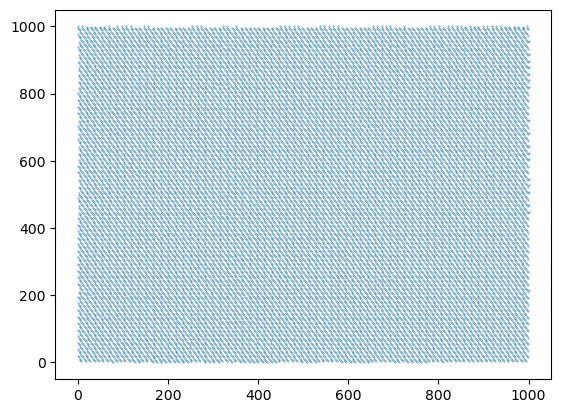

In [10]:
x, y, z = ics.pos.T
zslice = (z > 100) & (z < 102)
plt.scatter(x[zslice][::10], y[zslice][::10], s=0.1)

# read snapshot

In [11]:
snap = Q.Nbody('/Users/mcc3842/CosmicSim2025/data/quijote/fiducial/0', z=0.5)

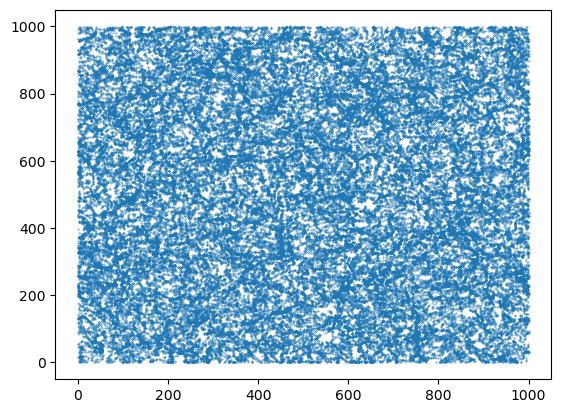

In [12]:
x, y, z = snap.pos.T
zslice = (z > 100) & (z < 101)
plt.scatter(x[zslice], y[zslice], s=0.1)

# read halos

In [14]:
halos = Q.Halos('/Users/mcc3842/CosmicSim2025/data/quijote/fiducial/1', z=0.5)

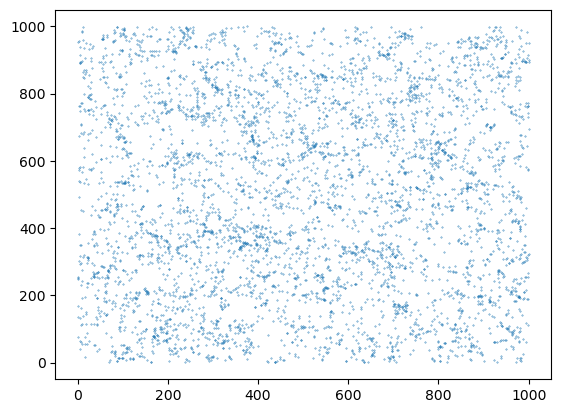

In [15]:
x, y, z = np.array(halos['Position']).T
zslice = (z > 100) & (z < 200)
plt.scatter(x[zslice], y[zslice], s=0.1)

# make HOD

In [32]:
# arbitrary HOD parameters

def make_HOD_params(seed):
    rng = np.random.default_rng(seed)
    theta_hod = {
        'logMmin' : rng.normal(loc=13.06, scale=0.08),
        'sigma_logM' : rng.normal(loc=0.34, scale=0.12),
        'logM0' : rng.normal(loc=13.74, scale=0.43),
        'logM1': rng.normal(loc=14.17, scale=0.47),
        'alpha': rng.normal(loc=0.69, scale=0.43),
        'Abias': rng.normal(loc=0.1, scale=0.20),
        'eta_conc': rng.normal(loc=1.12, scale=0.48),
        'eta_cen': rng.normal(loc=0.3, scale=0.07),
        'eta_sat': rng.normal(loc=1.26, scale=0.4)
    }
    return theta_hod
# theta_hod = {
#     'logMmin': 13.,
#     'sigma_logM': 0.2,
#     'logM0': 13.5,
#     'logM1': 14.,
#     'alpha': 0.7,
#     'Abias': 0, 
#     'eta_conc': 1.,
#     'eta_cen': 0.,
#  
#     'eta_sat': 1.}

In [33]:
seed=1234
theta_hod = make_HOD_params(seed)


In [34]:
hod = Q.HODgalaxies(theta_hod, '/Users/mcc3842/CosmicSim2025/data/quijote/fiducial/1', z=0.5)

/opt/homebrew/Caskroom/miniconda/base/envs/simbig/lib/python3.11/site-packages/halotools/empirical_models/phase_space_models/analytic_models/satellites/nfw/biased_nfw_phase_space.py:225: UserWarning: You have selected 18 bins to digitize host halo concentration 
and 96 bins to digitize the galaxy bias parameter.
To populate mocks, the BiasedNFWPhaseSpace class builds a lookup table with shape (18, 96, 101),
one entry for every numerical solution to the Jeans equation.
Using this fine of a binning requires a long pre-computation of 174528 integrals
.Make sure you actually need to use so many bins
  warn(lookup_table_performance_warning.format(*args))
/opt/homebrew/Caskroom/miniconda/base/envs/simbig/lib/python3.11/site-packages/halotools/empirical_models/factories/hod_model_factory.py:890: UserWarning: The composite model received multiple component models 
with a new_haloprop_func_dict that use the conc_NFWmodel key. 
Ignoring the one that appears in the profile component for satellite

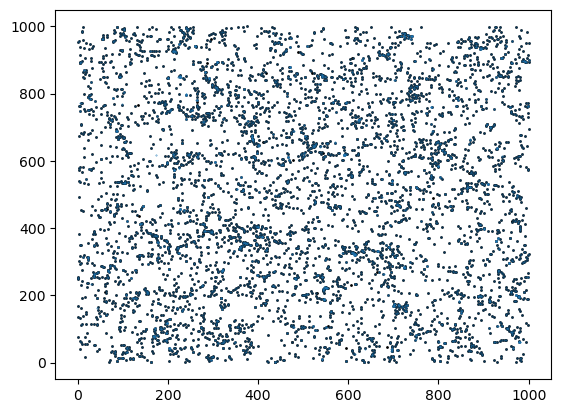

In [35]:
x0, y0, z0 = np.array(hod['Position']).T
zslice0 = (z0 > 100) & (z0 < 200)
plt.scatter(x[zslice], y[zslice], s=1, c='k')
plt.scatter(x0[zslice0], y0[zslice0], s=0.1)


(0.0, 100.0)

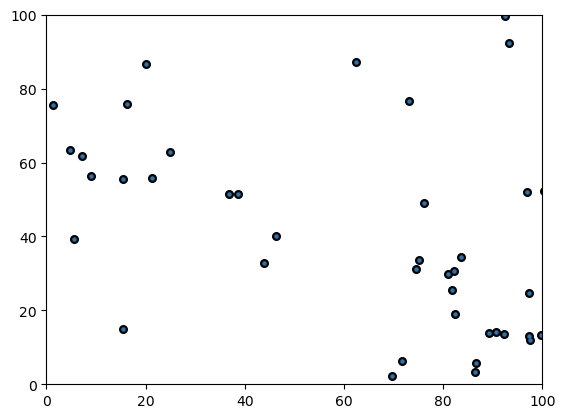

In [36]:
x0, y0, z0 = np.array(hod['Position']).T
zslice0 = (z0 > 100) & (z0 < 200)
plt.scatter(x[zslice], y[zslice], s=30, c='k')
plt.scatter(x0[zslice0], y0[zslice0], s=5)
plt.xlim(0., 100)
plt.ylim(0., 100)

In [ ]:
hod_rockstar = Q.Halos('/Users/mcc3842/CosmicSim2025/data/quijote/fiducial/1',z=0.5)
hod_rockstar[]

KeyError: 'column `BoxSize` is not defined in this source; try adding column via `source[column] = data`'

In [53]:
rockstar_spec = stats.Pk_periodic(np.array(hod_rockstar['Position']),Lbox=1000, Ngrid=256, Nmubin=20, fft='pyfftw', silent=False)
gen_spec = stats.Pk_periodic(np.array(hod['Position']), Lbox=1000, Ngrid=256, Nmubin=20, fft='pyfftw', silent=False)

------------------
3 positions in 1000 box
nbar = 0.000000
--- calculating the FFT ---
3 positions, Ntot=3
positions assigned to grid
position grid FFTed
fcomb complete
--- correcting for shotnoise ---
------------------
3 positions in 1000 box
nbar = 0.000000
--- calculating the FFT ---
3 positions, Ntot=3
positions assigned to grid
position grid FFTed
fcomb complete
--- correcting for shotnoise ---


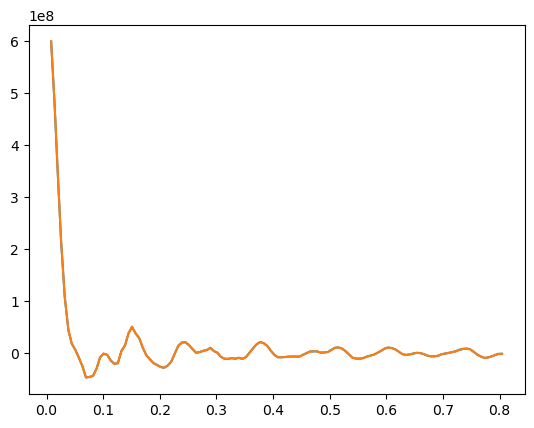

In [54]:
plt.plot(rockstar_spec['k'], rockstar_spec['p0k'])
plt.plot(gen_spec['k'], gen_spec['p0k'])